In [1]:
%matplotlib notebook
%pylab
from scipy.interpolate import griddata
import pandas as pd
from time import perf_counter
from sympy import*

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
#from poisson_2D_functions import*
from module_poisson_2D import*

In [3]:
order = array([1])        # polynomial order
N_element = array([8])

integration_type = 1      # % = 1 is inexact and = 2 is exact
iplot = False             # plot the solution
plot_rate = 1

ax = -1
bx = 1

alpha = 0              
beta = 1                  # Neumann: alpha = 1, beta = 0
                          # Dirichlet: alpha = 0, beta = 1

c = 1
icase = 2
len_el = len(N_element)
len_pol = len(order)
l2e_norm = zeros((len_pol, len_el))
max_norm = zeros((len_pol, len_el))

Nv = N_element
    
for iN,N in enumerate(order):
    
    N = order[iN]
    if (integration_type == 1):
        Q = N
    elif (integration_type == 2):
        Q = N+1

    wall = 0
    

    for e, nel in enumerate(Nv):
            
        Nelx = nel; Nely = nel
        Nx = Nelx*N+1
        Ny = Nely*N+1
        Np = Nx*Ny
        Ne = Nelx*Nely
        Nbound = 2*Nx + 2*(Ny-2)
        Nside = 2*Ne + Nelx + Nely
        
        tic = perf_counter()
        
    
        #qe, q, coord, intma, Lmatrix = poisson_solver(N,Q,Ne, Np, ax, bx, Nelx, Nely, Nx, Ny, Nbound,Nside,c,icase)
        
        qe, q, coord, intma, Lmatrix = poisson_solver(N,Q,Ne, Np, ax, bx, Nelx, Nely, Nx, Ny, Nbound,Nside,c,\
                                                      icase,alpha,beta)
    
        if(plot_rate == 1):
            #Compute Norm
            top = 0
            bot = 0

            for i in range(Np):
                top = top + (q[i] - qe[i])**2
                bot = bot + qe[i]**2

            e2 = sqrt(top/bot)

            l2e_norm[iN,e] = e2
        

N = 1, nel = 64, Np = 81


In [9]:
xmin = min(coord[:,0])
xmax = max(coord[:,0])
ymin = min(coord[:,1])
ymax = max(coord[:,1])
xe = coord[:,0]
ye = coord[:,1]
nx = 200
ny = 200
dx = (xmax-xmin)/nx
dy = (ymax-ymin)/ny
x1 = arange(xmin,xmax+dx,dx)
y1 = arange(ymin,ymax+dy,dy)
xi,yi = meshgrid(x1,y1)

<IPython.core.display.Javascript object>


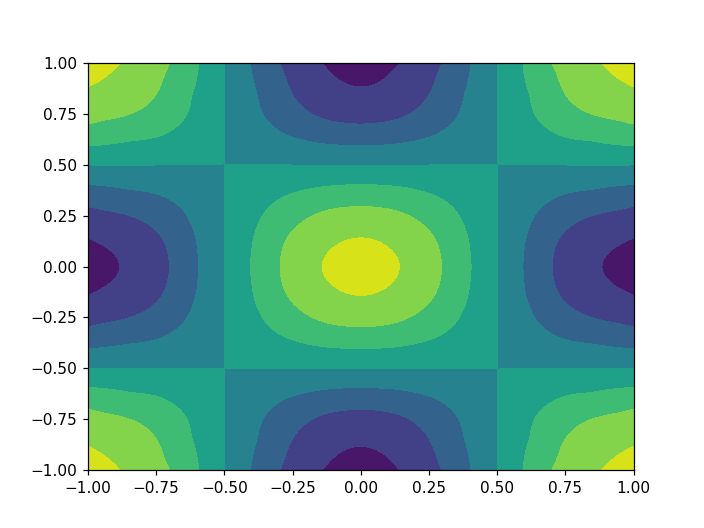

In [10]:
figure(1)
qe_2d = griddata((xe,ye),qe,(xi,yi), method='cubic')
contourf(xi,yi,qe_2d)

<IPython.core.display.Javascript object>


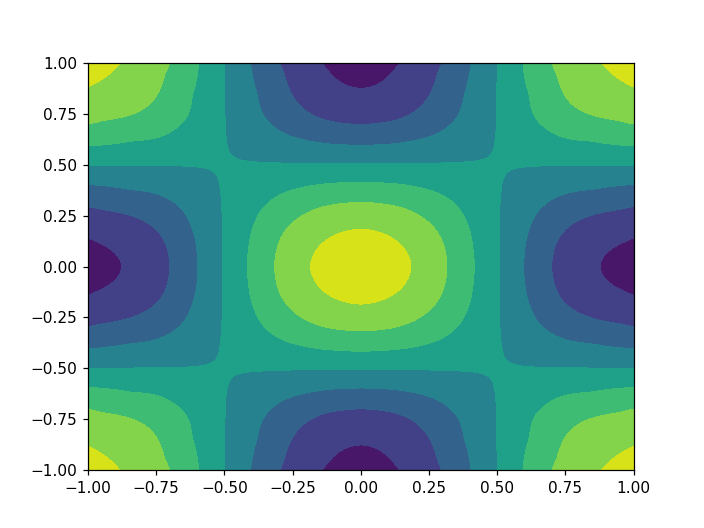

In [11]:
figure(2)
q_2d = griddata((xe,ye),q,(xi,yi), method='cubic')
contourf(xi,yi,q_2d)

<IPython.core.display.Javascript object>


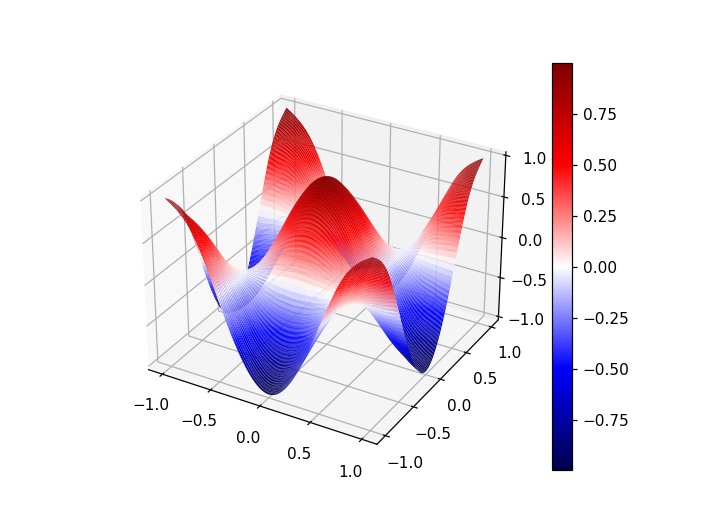

In [12]:
fig = figure(4)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xi,yi,qe_2d,rstride=2, cstride=1, cmap=cm.seismic)
fig.colorbar(surf)
show()

<IPython.core.display.Javascript object>


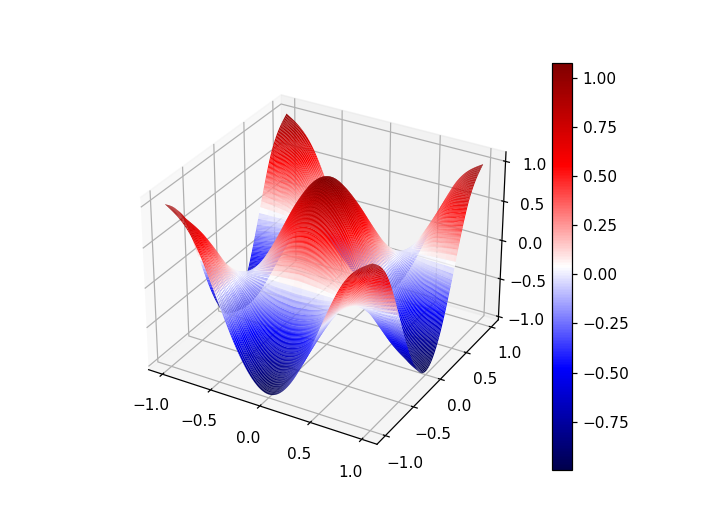

In [13]:
fig = figure(5)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xi,yi,q_2d,rstride = 2, cstride = 1, cmap = cm.seismic)
fig.colorbar(surf)
show()

<IPython.core.display.Javascript object>


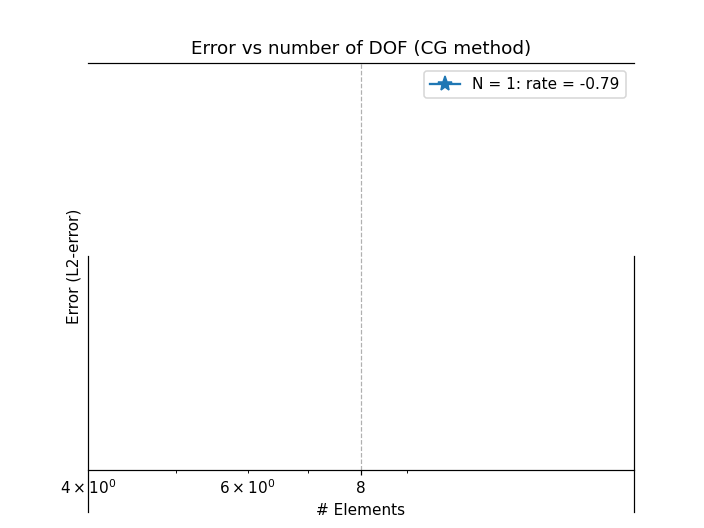

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
if(plot_rate == 1):
    import cg_graphics
    figure(6)
    clf()

    for i,N in enumerate(order):

        if(N == 6):
            p = polyfit(log(Nv[:2]), log(l2e_norm[i][:2]),1)
        else:
            p = polyfit(log(Nv), log(l2e_norm[i]), 1)

        loglog(Nv, l2e_norm[i], '-*',markersize=10, label = 'N = {:d}: rate = {:.2f}'.format(N,p[0]))

        loglog(Nv, exp(polyval(p,log(Nv))), '--')

    cg_graphics.set_xticks(Nv)
    xlabel('# Elements')
    ylabel('Error (L2-error)')
    title('Error vs number of DOF ({:s} method)'.format('cg'.upper()))
    grid(axis='both',linestyle='--')
    legend()
    show()   

In [15]:
xmin = 0
xmax = 2
ymin = 0
ymax = 2
nx = 1000
ny = 1000
dx = (xmax-xmin)/nx
dy = (ymax-ymin)/ny

x2 = arange(xmin,xmax+dx,dx)
y2 = arange(ymin,ymax+dy,dy)

xi,yi = meshgrid(x2,y2)

In [16]:
ue = lambda x,y: (100/2)*y

Ue = ue(xi,yi)


<IPython.core.display.Javascript object>


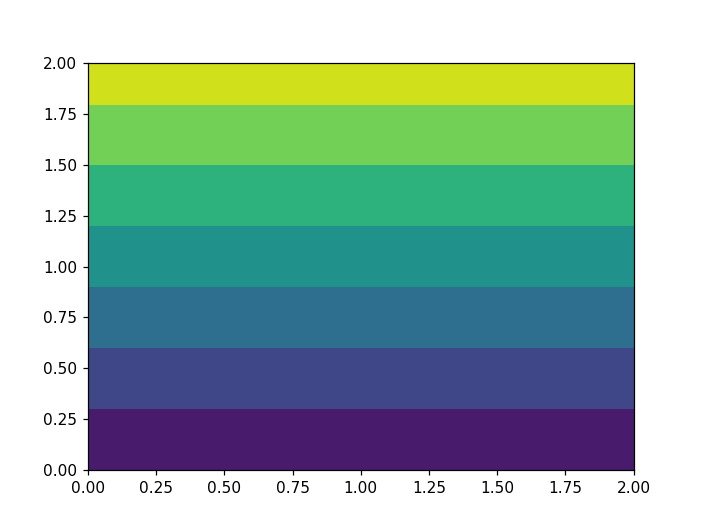

In [17]:
figure(7)
contourf(xi,yi,Ue)